In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,Flatten
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.datasets import mnist
from keras.utils import  to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras

In [2]:
train_df = pd.read_csv('../data/sign_mnist_train.csv')
test_df = pd.read_csv('../data/sign_mnist_test.csv')

In [3]:
print(train_df.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [4]:
X_train_df = train_df.iloc[:,1:]
y_train_df = train_df.iloc[:,0]
X_test_df = test_df.iloc[:,1:]
y_test_df = test_df.iloc[:,0]

In [5]:
print('학습셋 이미지 수 : %d 개'%(X_train_df.shape[0]))
print('테스트셋 이미지 수 : %d 개'%(X_test_df.shape[0]))


학습셋 이미지 수 : 27455 개
테스트셋 이미지 수 : 7172 개


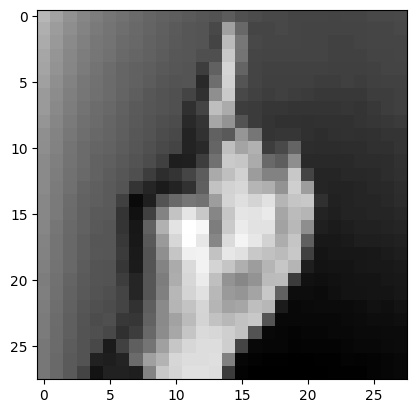

In [6]:
X_train = pd.DataFrame(X_train_df).to_numpy()
#-1은 파이썬에서 reshape 실행하는 함수 면 행 열 칼라 순이다 그런대 -1을하면 면의 갯수를 설정안해도 알아서한다.
X_train = X_train.reshape(-1,28,28,1)
plt.imshow(X_train[0],cmap='Greys')
plt.show()

In [7]:
import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-4s"%i)
    sys.stdout.write('\n')

[107][118][127][134][139][143][146][150][153][156][158][160][163][165][159][166][168][170][170][171][171][171][172][171][171][170][170][169]
[111][121][129][135][141][144][148][151][154][157][160][163][164][170][119][152][171][171][170][171][172][172][172][172][172][171][171][170]
[113][123][131][137][142][145][150][152][155][158][161][163][164][172][105][142][170][171][171][171][172][172][173][173][172][171][171][171]
[116][125][133][139][143][146][151][153][156][159][162][163][167][167][95][144][171][172][172][172][172][172][173][173][173][172][172][171]
[117][126][134][140][145][149][153][156][158][161][163][164][175][156][87][154][172][173][173][173][173][173][174][174][174][173][172][172]
[119][128][136][142][146][150][153][156][159][163][165][164][184][148][89][164][172][174][174][174][174][175][175][174][175][174][173][173]
[122][130][138][143][147][150][154][158][162][165][166][172][181][128][94][170][173][175][174][175][176][177][177][177][177][175][175][174]
[122][132][139][1

In [8]:
X_train = X_train.reshape(X_train.shape[0],784).astype('float64')/255
X_test = pd.DataFrame(X_test_df).to_numpy()
X_test = X_test.reshape(X_test.shape[0],784).astype('float64')/255


In [9]:
#클래스 값을 확인해 봅시다
print('class : %d'%(y_train_df[0]))

class : 3


In [10]:
y_train = to_categorical(y_train_df,25)
y_test =to_categorical(y_test_df,25)
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [11]:
model = Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(25,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 25)                12825     
                                                                 
Total params: 414,745
Trainable params: 414,745
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [13]:
import os
modelpath = '../data/model/MNIST_MLP.hdf5'
MODEL_DIR = '../data/model/'
# if not os.path.exists(MODEL_DIR):
#     os.path.
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',
                               verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

In [18]:
#모델을 실행합니다.
history = model.fit(X_train,y_train,validation_split=0.25,epochs=100,
                    batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])



Epoch 1: val_loss improved from 0.04554 to 0.03730, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 2: val_loss did not improve from 0.03730

Epoch 3: val_loss improved from 0.03730 to 0.03108, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 4: val_loss did not improve from 0.03108

Epoch 5: val_loss improved from 0.03108 to 0.02495, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 6: val_loss did not improve from 0.02495

Epoch 7: val_loss did not improve from 0.02495

Epoch 8: val_loss improved from 0.02495 to 0.02012, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.02012

Epoch 10: val_loss improved from 0.02012 to 0.01767, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 11: val_loss improved from 0.01767 to 0.01600, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 12: val_loss improved from 0.01600 to 0.01526, saving model to ../data/model\MNIST_MLP.hdf5

Epoch 13: val_loss did not improve from 0.01526

Epoch 14: val_loss im

In [19]:
#테스트 정확도를 출력합니다.
print('\n TEST Accuracy: %.4f'%(model.evaluate(X_test,y_test)[1]))

225/225 [==============================] - 1s 3ms/step - loss: 1.0854 - accuracy: 0.7522

 TEST Accuracy: 0.7522


In [16]:
#검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

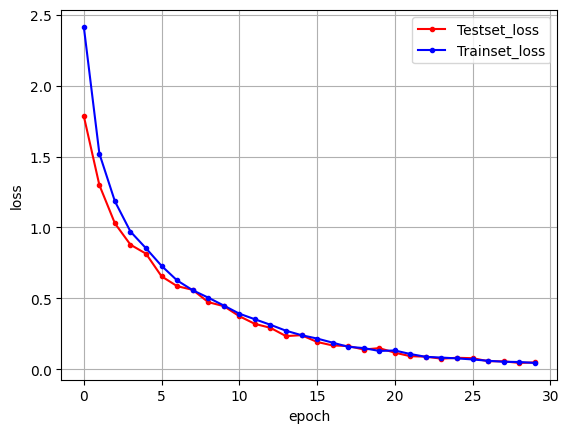

In [17]:
import numpy as np
x_len = np.arange(len(y_loss))

plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()